In [8]:
# importing liberaries
import ast
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Most demanded skills for top 3 data roles

In [4]:

df_us = df[df['job_country'] == 'United States']
df_skills = df.copy()
df_skills = df_us.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count =	df_skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True) 
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [5]:

# resetting index to make it a dataframe
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [6]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how= 'left', on ='job_title_short')
df_skills_perc['skill_perc'] = 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


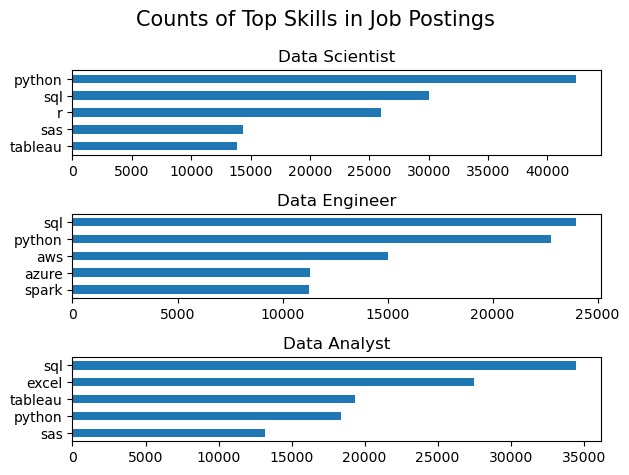

In [7]:
# creating list of job_titles then using subplots function of matplotlib,
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    


fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()

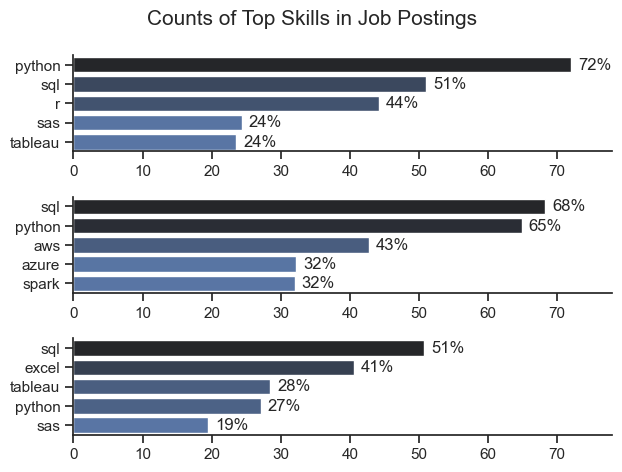

In [77]:
# creating list of job_titles then using subplots function of matplotlib,

fig, ax = plt.subplots(len(job_titles),1)

sns.set_theme(style = 'ticks')
rc= {'patch.edgecolor': 'none','patch.linewidth': 0}

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
   sns.barplot(data = df_plot, x = 'skill_perc', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette = 'dark:b_r' )
   ax[i].spines[['top', 'right']].set_visible(False)    # removing top and side borders
   ax[i].set_xlabel('')
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0,78)


# showing precent values in front of the bars, creating proper space and using proper format
   for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f"{v:.0f}%", va='center')

  

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()
plt.show()